In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.cluster import hierarchy
from sklearn import metrics

# Load data

In [2]:
data = pd.read_excel('GCI_Dataset_2007-2017.xlsx',
              sheet_name='Data', skiprows = 3) 

In [24]:
countries = pd.read_excel('GCI_Dataset_2007-2017.xlsx',
              sheet_name='Entities', skiprows = 2) 


## Initial clean

In [26]:
# Clean not needed columns
countries.drop(['Entity type'], axis = 1, inplace = True)

#change column name
countries.columns = ['Entity code', 'Entity', 'income_group', 'econ_region', 'geo_region']

In [5]:
data.drop(['Unnamed: 160', 'East Asia and Pacific', 'East Asia and Pacific', 'Latin America and the Caribbean',
          'Europe and North America', 'Eurasia', 'Sub-Saharan Africa', 
           'South Asia', 'Middle East and North Africa'], axis = 1, inplace = True)

In [33]:
countries.sample(5)

Entity code          Entity         income_group         econ_region  \
35         CYP          Cyprus          High income  Advanced economies   
2          AGO          Angola  Upper middle income  Sub-Saharan Africa   
33         CIV   Côte d'Ivoire  Lower middle income  Sub-Saharan Africa   
6          AUT         Austria          High income  Advanced economies   
36         CZE  Czech Republic          High income  Advanced economies   

                  geo_region  
35  Europe and North America  
2         Sub-Saharan Africa  
33        Sub-Saharan Africa  
6   Europe and North America  
36  Europe and North America

In [220]:
data.sample(3)

Placement                       Dataset    Edition   GLOBAL ID Code GCR  \
5096         17  Global Competitiveness Index  2010-2011     EOSQ033     1.13   
4826         63  Global Competitiveness Index  2011-2012       GCI.A        A   
745         125  Global Competitiveness Index  2017-2018  NETUSERPCT     9.04   

                                                 Series  \
5096             1.13 Business costs of terrorism, 1...   
4826                                 Basic requirements   
745                 9.04 Individuals using Internet, %*   

                            Series unindented Attribute            Albania  \
5096  Business costs of terrorism, 1-7 (best)     Value            6.11481   
4826                       Basic requirements    Period  2011-2012 edition   
745            Individuals using Internet, %*    Period               2016   

                Algeria  ...            Ukraine United Arab Emirates  \
5096            4.40329  ...            6.03032              6.24058   
4826  2011-2012 edition  ...  2011-2012 edition    2011-2012 edition   
745                2016  ...               2016                 2016   

         United Kingdom      United States            Uruguay  \
5096            5.17459            4.53668            6.76846   
4826  2011-2012 edition  2011-2012 edition  2011-2012 edition   
745                2016               2016               2016   

              Venezuela           Viet Nam              Yemen  \
5096            4.93178            4.97444                NaN   
4826  2011-2012 edition  2011-2012 edition  2011-2012 edition   
745                2016               2016               2016   

                 Zambia           Zimbabwe  
5096            6.09064            6.63038  
4826  2011-2012 edition  2011-2012 edition  
745                2016               2016  

[3 rows x 160 columns]

# Make education & internet -focus data set for 2018

In [8]:
# Select attributes needed
global_id_list = ['EOSQ129',
'ENROL1NET',
'EOSQ128',
'EOSQ130',
'EOSQ084',
'NETUSERPCT',
'BBSUBPC',
'INTBDWIDUSER']

In [16]:
# Select data with selected attribute 
edu_df = data[data['GLOBAL ID'].isin(global_id_list)]

# Select data from 2017-2018 report
edu_df = edu_df[edu_df.Edition == '2017-2018']

# Select value only (exclude rank, report, etc.)
edu_df = edu_df[edu_df.Attribute.isin(['Value'])]

# Drop not needed columns
edu_df.drop(['Placement','Dataset','Edition','GLOBAL ID','Code GCR','Series','Attribute'], axis = 1, inplace = True)

In [17]:
# Show 19 Countries with missing data
missing_countries = edu_df.columns[edu_df.isnull().any()]
missing_countries

Index(['Angola', 'Barbados', 'Belize', 'Bolivia', 'Burkina Faso',
       'Côte d'Ivoire', 'Gabon', 'Guyana', 'Haiti', 'Libya', 'Macedonia, FYR',
       'Madagascar', 'Myanmar', 'Puerto Rico', 'Slovak Republic', 'Suriname',
       'Syria', 'Timor-Leste'],
      dtype='object')

In [18]:
# exclude countries with missing data
edu_df.drop(missing_countries, axis = 1, inplace = True)

edu_df.head()

Series unindented  Albania  Algeria  \
348           Quality of primary education, 1-7 (best)  5.05699  3.40836   
354               Primary education enrollment, net %*  95.5173  97.0621   
396        Quality of the education system, 1-7 (best)  4.28658  3.21236   
402  Quality of math and science education, 1-7 (best)  4.29543  3.62119   
414             Internet access in schools, 1-7 (best)  5.27142  3.27643   

    Argentina  Armenia Australia  Austria Azerbaijan  Bahrain Bangladesh  ...  \
348   3.31086  4.25528    5.3779  4.76358    4.19407  4.74835    3.10414  ...   
354   99.3468  96.0742   97.0328     98.1    94.1426  96.4285    90.5086  ...   
396   3.17313  3.84729   5.06772  4.22853     4.4004  4.63919    3.39629  ...   
402   3.14621  4.72783   4.79443  4.57015    4.16795  4.78052    3.17483  ...   
414   3.95256  4.25431   6.00692  5.03867    4.88868   4.9606    3.26519  ...   

     Ukraine United Arab Emirates United Kingdom United States  Uruguay  \
348  4.60347               5.3988        5.04819       5.52632  3.43285   
354  96.1755               93.375        99.8543       93.7542  94.2177   
396  3.86212              5.27967        4.67399       5.62064  2.70358   
402  4.84127              5.34237        4.57445       5.44542  2.95702   
414  4.80328               5.8288        5.70223       5.87299  5.60296   

    Venezuela Viet Nam    Yemen   Zambia Zimbabwe  
348   2.76061  3.42251  2.37473  3.35523  4.19186  
354   89.8568  97.9651  84.8373  87.4041  85.8624  
396   2.56436  3.63319   2.2852  3.75072  4.04583  
402   2.81751  3.73783  2.43551  3.66483   4.1466  
414   3.32454  4.05935  1.59184  3.20338  3.18219  

[5 rows x 135 columns]

In [19]:
# clean attribute names
edu_df['Series unindented'] = edu_df['Series unindented'].apply(lambda x: x.strip('*'))

# Print all attribute
attribute_val = edu_df['Series unindented']
attribute_val = list(attribute_val)
attribute_val

['Quality of primary education, 1-7 (best)',
 'Primary education enrollment, net %',
 'Quality of the education system, 1-7 (best)',
 'Quality of math and science education, 1-7 (best)',
 'Internet access in schools, 1-7 (best)',
 'Individuals using Internet, %',
 'Fixed broadband Internet subscriptions/100 pop.',
 'Int’l Internet bandwidth, kb/s per user']

In [20]:
# melt into long-form format for analysis 
edu_df = pd.melt(edu_df, id_vars=['Series unindented'], var_name = 'country', value_name = 'value')

# merge with entity data
edu_df = edu_df.merge(countries, how = 'left', left_on = 'country', right_on = 'Entity').drop(['Entity'], axis = 1)

#Change col name to simpler names
new_col_names = ['attribute', 'country', 'value', 'entity_code', 'income_group', 'econ_region', 'geo_region']
edu_df.columns = new_col_names

# edit data type
edu_df.value = edu_df.value.astype('float32')

edu_df.sample(5)

attribute      country  \
498        Quality of the education system, 1-7 (best)  Korea, Rep.   
907  Quality of math and science education, 1-7 (best)    Swaziland   
108             Internet access in schools, 1-7 (best)     Botswana   
942    Fixed broadband Internet subscriptions/100 pop.   Tajikistan   
679            Int’l Internet bandwidth, kb/s per user      Namibia   

         value entity_code         income_group  \
498   3.482000         KOR          High income   
907   3.577778         SWZ  Lower middle income   
108   3.594990         BWA  Upper middle income   
942   0.068095         TJK  Lower middle income   
679  15.915365         NAM  Upper middle income   

                            econ_region             geo_region  
498                  Advanced economies  East Asia and Pacific  
907                  Sub-Saharan Africa     Sub-Saharan Africa  
108                  Sub-Saharan Africa     Sub-Saharan Africa  
942  Commonwealth of Independent States                Eurasia  
679                  Sub-Saharan Africa     Sub-Saharan Africa

# Explore data

## Explore Countries label 

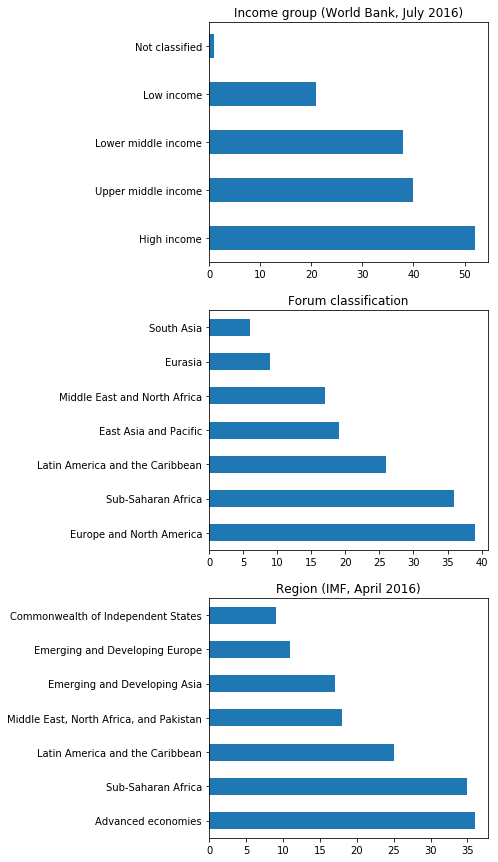

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(5,15))

for val, ax in zip(['Income group (World Bank, July 2016)','Forum classification','Region (IMF, April 2016)' ], axes.flatten()):
    countries[val].value_counts().plot(kind='barh', ax = ax)
    ax.set_title('{}'.format(val))
    ax.set_xlabel('')
plt.show()

In [27]:
econ_region = countries.groupby('econ_region')
for region,rows in econ_region:
    display(region,rows)

'Advanced economies'

Entity code           Entity income_group         econ_region  \
5           AUS        Australia  High income  Advanced economies   
6           AUT          Austria  High income  Advanced economies   
11          BEL          Belgium  High income  Advanced economies   
25          CAN           Canada  High income  Advanced economies   
35          CYP           Cyprus  High income  Advanced economies   
36          CZE   Czech Republic  High income  Advanced economies   
37          DNK          Denmark  High income  Advanced economies   
42          EST          Estonia  High income  Advanced economies   
44          FIN          Finland  High income  Advanced economies   
45          FRA           France  High income  Advanced economies   
49          DEU          Germany  High income  Advanced economies   
51          GRC           Greece  High income  Advanced economies   
57          HKG    Hong Kong SAR  High income  Advanced economies   
59          ISL          Iceland  High income  Advanced economies   
63          IRL          Ireland  High income  Advanced economies   
64          ISR           Israel  High income  Advanced economies   
65          ITA            Italy  High income  Advanced economies   
67          JPN            Japan  High income  Advanced economies   
71          KOR      Korea, Rep.  High income  Advanced economies   
75          LVA           Latvia  High income  Advanced economies   
80          LTU        Lithuania  High income  Advanced economies   
81          LUX       Luxembourg  High income  Advanced economies   
87          MLT            Malta  High income  Advanced economies   
99          NLD      Netherlands  High income  Advanced economies   
100         NZL      New Zealand  High income  Advanced economies   
103         NOR           Norway  High income  Advanced economies   
111         PRT         Portugal  High income  Advanced economies   
122         SGP        Singapore  High income  Advanced economies   
123         SVK  Slovak Republic  High income  Advanced economies   
124         SVN         Slovenia  High income  Advanced economies   
126         ESP            Spain  High income  Advanced economies   
130         SWE           Sweden  High income  Advanced economies   
131         CHE      Switzerland  High income  Advanced economies   
133         TWN    Taiwan, China  High income  Advanced economies   
144         GBR   United Kingdom  High income  Advanced economies   
145         USA    United States  High income  Advanced economies   

                       geo_region  
5           East Asia and Pacific  
6        Europe and North America  
11       Europe and North America  
25       Europe and North America  
35       Europe and North America  
36       Europe and North America  
37       Europe and North America  
42       Europe and North America  
44       Europe and North America  
45       Europe and North America  
49       Europe and North America  
51       Europe and North America  
57          East Asia and Pacific  
59       Europe and North America  
63       Europe and North America  
64   Middle East and North Africa  
65       Europe and North America  
67          East Asia and Pacific  
71          East Asia and Pacific  
75       Europe and North America  
80       Europe and North America  
81       Europe and North America  
87       Europe and North America  
99       Europe and North America  
100         East Asia and Pacific  
103      Europe and North America  
111      Europe and North America  
122         East Asia and Pacific  
123      Europe and North America  
124      Europe and North America  
126      Europe and North America  
130      Europe and North America  
131      Europe and North America  
133         East Asia and Pacific  
144      Europe and North America  
145      Europe and North America

'Commonwealth of Independent States'

Entity code              Entity         income_group  \
4           ARM             Armenia  Lower middle income   
7           AZE          Azerbaijan  Upper middle income   
48          GEO             Georgia  Upper middle income   
69          KAZ          Kazakhstan  Upper middle income   
73          KGZ     Kyrgyz Republic  Lower middle income   
91          MDA             Moldova  Lower middle income   
115         RUS  Russian Federation  Upper middle income   
134         TJK          Tajikistan  Lower middle income   
142         UKR             Ukraine  Lower middle income   

                            econ_region geo_region  
4    Commonwealth of Independent States    Eurasia  
7    Commonwealth of Independent States    Eurasia  
48   Commonwealth of Independent States    Eurasia  
69   Commonwealth of Independent States    Eurasia  
73   Commonwealth of Independent States    Eurasia  
91   Commonwealth of Independent States    Eurasia  
115  Commonwealth of Independent States    Eurasia  
134  Commonwealth of Independent States    Eurasia  
142  Commonwealth of Independent States    Eurasia

'Emerging and Developing Asia'

Entity code             Entity         income_group  \
9           BGD         Bangladesh  Lower middle income   
14          BTN             Bhutan  Lower middle income   
19          BRN  Brunei Darussalam          High income   
23          KHM           Cambodia  Lower middle income   
29          CHN              China  Upper middle income   
60          IND              India  Lower middle income   
61          IDN          Indonesia  Lower middle income   
74          LAO            Lao PDR  Lower middle income   
85          MYS           Malaysia  Upper middle income   
92          MNG           Mongolia  Lower middle income   
96          MMR            Myanmar  Lower middle income   
98          NPL              Nepal           Low income   
109         PHL        Philippines  Lower middle income   
127         LKA          Sri Lanka  Lower middle income   
136         THA           Thailand  Upper middle income   
137         TLS        Timor-leste  Lower middle income   
148         VNM           Viet Nam  Lower middle income   

                      econ_region             geo_region  
9    Emerging and Developing Asia             South Asia  
14   Emerging and Developing Asia             South Asia  
19   Emerging and Developing Asia  East Asia and Pacific  
23   Emerging and Developing Asia  East Asia and Pacific  
29   Emerging and Developing Asia  East Asia and Pacific  
60   Emerging and Developing Asia             South Asia  
61   Emerging and Developing Asia  East Asia and Pacific  
74   Emerging and Developing Asia  East Asia and Pacific  
85   Emerging and Developing Asia  East Asia and Pacific  
92   Emerging and Developing Asia  East Asia and Pacific  
96   Emerging and Developing Asia  East Asia and Pacific  
98   Emerging and Developing Asia             South Asia  
109  Emerging and Developing Asia  East Asia and Pacific  
127  Emerging and Developing Asia             South Asia  
136  Emerging and Developing Asia  East Asia and Pacific  
137  Emerging and Developing Asia  East Asia and Pacific  
148  Emerging and Developing Asia  East Asia and Pacific

'Emerging and Developing Europe'

Entity code                  Entity         income_group  \
0           ALB                 Albania  Upper middle income   
16          BIH  Bosnia and Herzegovina  Upper middle income   
20          BGR                Bulgaria  Upper middle income   
34          HRV                 Croatia          High income   
58          HUN                 Hungary          High income   
82          MKD          Macedonia, FYR  Upper middle income   
93          MNE              Montenegro  Upper middle income   
110         POL                  Poland          High income   
114         ROU                 Romania  Upper middle income   
119         SRB                  Serbia  Upper middle income   
140         TUR                  Turkey  Upper middle income   

                        econ_region                geo_region  
0    Emerging and Developing Europe  Europe and North America  
16   Emerging and Developing Europe  Europe and North America  
20   Emerging and Developing Europe  Europe and North America  
34   Emerging and Developing Europe  Europe and North America  
58   Emerging and Developing Europe  Europe and North America  
82   Emerging and Developing Europe  Europe and North America  
93   Emerging and Developing Europe  Europe and North America  
110  Emerging and Developing Europe  Europe and North America  
114  Emerging and Developing Europe  Europe and North America  
119  Emerging and Developing Europe  Europe and North America  
140  Emerging and Developing Europe  Europe and North America

'Latin America and the Caribbean'

Entity code               Entity         income_group  \
3           ARG            Argentina       Not classified   
10          BRB             Barbados          High income   
12          BLZ               Belize  Upper middle income   
15          BOL              Bolivia  Lower middle income   
18          BRA               Brazil  Upper middle income   
28          CHL                Chile          High income   
30          COL             Colombia  Upper middle income   
32          CRI           Costa Rica  Upper middle income   
38          DOM   Dominican Republic  Upper middle income   
39          ECU              Ecuador  Upper middle income   
41          SLV          El Salvador  Lower middle income   
52          GTM            Guatemala  Lower middle income   
54          GUY               Guyana  Upper middle income   
55          HTI                Haiti           Low income   
56          HND             Honduras  Lower middle income   
66          JAM              Jamaica  Upper middle income   
90          MEX               Mexico  Upper middle income   
101         NIC            Nicaragua  Lower middle income   
106         PAN               Panama  Upper middle income   
107         PRY             Paraguay  Upper middle income   
108         PER                 Peru  Upper middle income   
128         SUR             Suriname  Upper middle income   
138         TTO  Trinidad and Tobago          High income   
146         URY              Uruguay          High income   
147         VEN            Venezuela  Upper middle income   

                         econ_region                       geo_region  
3    Latin America and the Caribbean  Latin America and the Caribbean  
10   Latin America and the Caribbean  Latin America and the Caribbean  
12   Latin America and the Caribbean  Latin America and the Caribbean  
15   Latin America and the Caribbean  Latin America and the Caribbean  
18   Latin America and the Caribbean  Latin America and the Caribbean  
28   Latin America and the Caribbean  Latin America and the Caribbean  
30   Latin America and the Caribbean  Latin America and the Caribbean  
32   Latin America and the Caribbean  Latin America and the Caribbean  
38   Latin America and the Caribbean  Latin America and the Caribbean  
39   Latin America and the Caribbean  Latin America and the Caribbean  
41   Latin America and the Caribbean  Latin America and the Caribbean  
52   Latin America and the Caribbean  Latin America and the Caribbean  
54   Latin America and the Caribbean  Latin America and the Caribbean  
55   Latin America and the Caribbean  Latin America and the Caribbean  
56   Latin America and the Caribbean  Latin America and the Caribbean  
66   Latin America and the Caribbean  Latin America and the Caribbean  
90   Latin America and the Caribbean  Latin America and the Caribbean  
101  Latin America and the Caribbean  Latin America and the Caribbean  
106  Latin America and the Caribbean  Latin America and the Caribbean  
107  Latin America and the Caribbean  Latin America and the Caribbean  
108  Latin America and the Caribbean  Latin America and the Caribbean  
128  Latin America and the Caribbean  Latin America and the Caribbean  
138  Latin America and the Caribbean  Latin America and the Caribbean  
146  Latin America and the Caribbean  Latin America and the Caribbean  
147  Latin America and the Caribbean  Latin America and the Caribbean

'Middle East, North Africa, and Pakistan'

Entity code                Entity         income_group  \
1           DZA               Algeria  Upper middle income   
8           BHR               Bahrain          High income   
40          EGY                 Egypt  Lower middle income   
62          IRN    Iran, Islamic Rep.  Upper middle income   
68          JOR                Jordan  Upper middle income   
72          KWT                Kuwait          High income   
76          LBN               Lebanon  Upper middle income   
79          LBY                 Libya  Upper middle income   
88          MRT            Mauritania  Lower middle income   
94          MAR               Morocco  Lower middle income   
104         OMN                  Oman          High income   
105         PAK              Pakistan  Lower middle income   
113         QAT                 Qatar          High income   
117         SAU          Saudi Arabia          High income   
132         SYR                 Syria  Lower middle income   
139         TUN               Tunisia  Lower middle income   
143         ARE  United Arab Emirates          High income   
149         YEM                 Yemen  Lower middle income   

                                 econ_region                    geo_region  
1    Middle East, North Africa, and Pakistan  Middle East and North Africa  
8    Middle East, North Africa, and Pakistan  Middle East and North Africa  
40   Middle East, North Africa, and Pakistan  Middle East and North Africa  
62   Middle East, North Africa, and Pakistan  Middle East and North Africa  
68   Middle East, North Africa, and Pakistan  Middle East and North Africa  
72   Middle East, North Africa, and Pakistan  Middle East and North Africa  
76   Middle East, North Africa, and Pakistan  Middle East and North Africa  
79   Middle East, North Africa, and Pakistan  Middle East and North Africa  
88   Middle East, North Africa, and Pakistan            Sub-Saharan Africa  
94   Middle East, North Africa, and Pakistan  Middle East and North Africa  
104  Middle East, North Africa, and Pakistan  Middle East and North Africa  
105  Middle East, North Africa, and Pakistan                    South Asia  
113  Middle East, North Africa, and Pakistan  Middle East and North Africa  
117  Middle East, North Africa, and Pakistan  Middle East and North Africa  
132  Middle East, North Africa, and Pakistan  Middle East and North Africa  
139  Middle East, North Africa, and Pakistan  Middle East and North Africa  
143  Middle East, North Africa, and Pakistan  Middle East and North Africa  
149  Middle East, North Africa, and Pakistan  Middle East and North Africa

'Sub-Saharan Africa'

Entity code                  Entity         income_group  \
2           AGO                  Angola  Upper middle income   
13          BEN                   Benin           Low income   
17          BWA                Botswana  Upper middle income   
21          BFA            Burkina Faso           Low income   
22          BDI                 Burundi           Low income   
24          CMR                Cameroon  Lower middle income   
26          CPV              Cape Verde  Lower middle income   
27          TCD                    Chad           Low income   
31          COD  Congo, Democratic Rep.           Low income   
33          CIV           Côte d'Ivoire  Lower middle income   
43          ETH                Ethiopia           Low income   
46          GAB                   Gabon  Upper middle income   
47          GMB             Gambia, The           Low income   
50          GHA                   Ghana  Lower middle income   
53          GIN                  Guinea           Low income   
70          KEN                   Kenya  Lower middle income   
77          LSO                 Lesotho  Lower middle income   
78          LBR                 Liberia           Low income   
83          MDG              Madagascar           Low income   
84          MWI                  Malawi           Low income   
86          MLI                    Mali           Low income   
89          MUS               Mauritius  Upper middle income   
95          MOZ              Mozambique           Low income   
97          NAM                 Namibia  Upper middle income   
102         NGA                 Nigeria  Lower middle income   
116         RWA                  Rwanda           Low income   
118         SEN                 Senegal           Low income   
120         SYC              Seychelles          High income   
121         SLE            Sierra Leone           Low income   
125         ZAF            South Africa  Upper middle income   
129         SWZ               Swaziland  Lower middle income   
135         TZA                Tanzania           Low income   
141         UGA                  Uganda           Low income   
150         ZMB                  Zambia  Lower middle income   
151         ZWE                Zimbabwe           Low income   

            econ_region          geo_region  
2    Sub-Saharan Africa  Sub-Saharan Africa  
13   Sub-Saharan Africa  Sub-Saharan Africa  
17   Sub-Saharan Africa  Sub-Saharan Africa  
21   Sub-Saharan Africa  Sub-Saharan Africa  
22   Sub-Saharan Africa  Sub-Saharan Africa  
24   Sub-Saharan Africa  Sub-Saharan Africa  
26   Sub-Saharan Africa  Sub-Saharan Africa  
27   Sub-Saharan Africa  Sub-Saharan Africa  
31   Sub-Saharan Africa  Sub-Saharan Africa  
33   Sub-Saharan Africa  Sub-Saharan Africa  
43   Sub-Saharan Africa  Sub-Saharan Africa  
46   Sub-Saharan Africa  Sub-Saharan Africa  
47   Sub-Saharan Africa  Sub-Saharan Africa  
50   Sub-Saharan Africa  Sub-Saharan Africa  
53   Sub-Saharan Africa  Sub-Saharan Africa  
70   Sub-Saharan Africa  Sub-Saharan Africa  
77   Sub-Saharan Africa  Sub-Saharan Africa  
78   Sub-Saharan Africa  Sub-Saharan Africa  
83   Sub-Saharan Africa  Sub-Saharan Africa  
84   Sub-Saharan Africa  Sub-Saharan Africa  
86   Sub-Saharan Africa  Sub-Saharan Africa  
89   Sub-Saharan Africa  Sub-Saharan Africa  
95   Sub-Saharan Africa  Sub-Saharan Africa  
97   Sub-Saharan Africa  Sub-Saharan Africa  
102  Sub-Saharan Africa  Sub-Saharan Africa  
116  Sub-Saharan Africa  Sub-Saharan Africa  
118  Sub-Saharan Africa  Sub-Saharan Africa  
120  Sub-Saharan Africa  Sub-Saharan Africa  
121  Sub-Saharan Africa  Sub-Saharan Africa  
125  Sub-Saharan Africa  Sub-Saharan Africa  
129  Sub-Saharan Africa  Sub-Saharan Africa  
135  Sub-Saharan Africa  Sub-Saharan Africa  
141  Sub-Saharan Africa  Sub-Saharan Africa  
150  Sub-Saharan Africa  Sub-Saharan Africa  
151  Sub-Saharan Africa  Sub-Saharan Africa

# Explore attributes

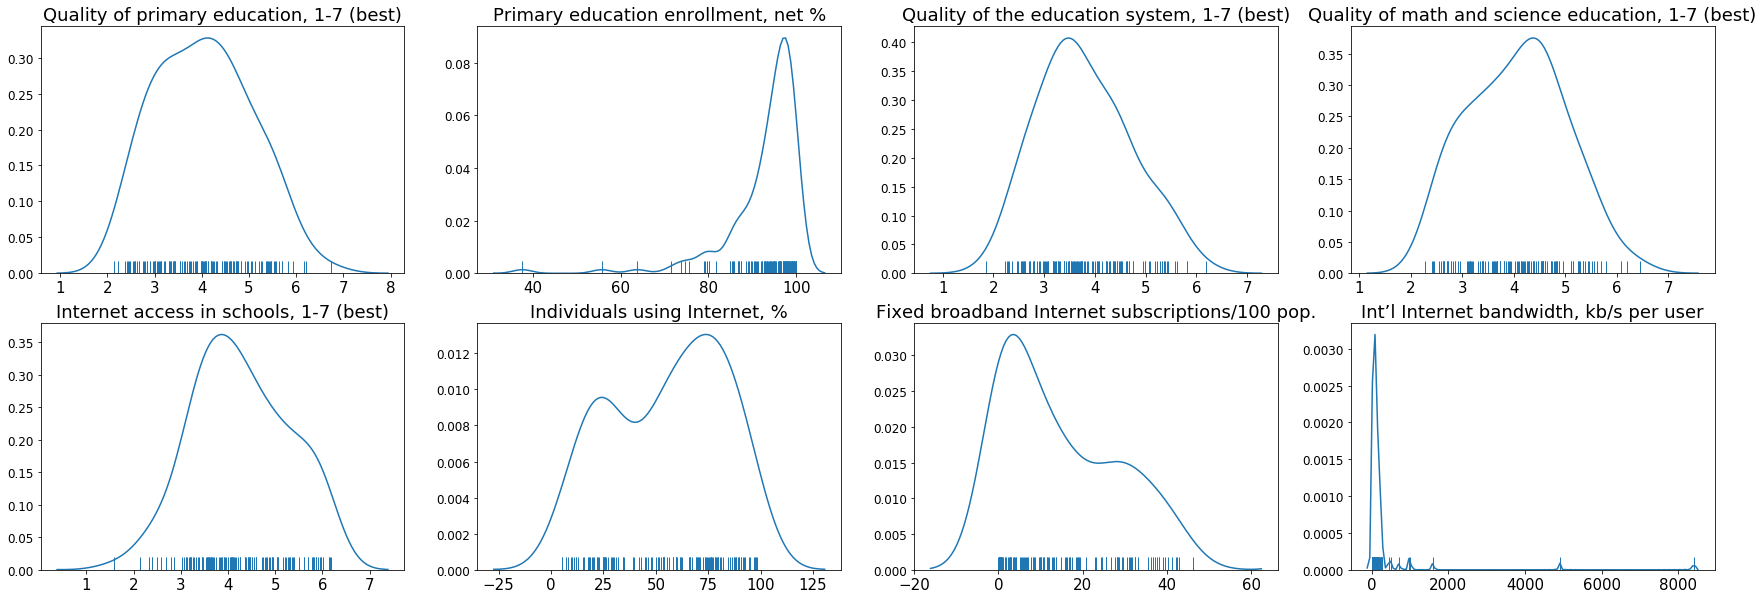

In [87]:
fig, axes = plt.subplots(2, 4, figsize=(30,10))

for val, ax in zip(attribute_val, axes.flatten()):
    a = edu_df[edu_df.attribute == val]['value']
    sns.distplot(a, hist=False, rug=True, ax = ax)
    ax.set_title('{}'.format(val), fontsize = 18)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=12)
plt.show()

## Explore 10 Attributes by 3 Country Categories

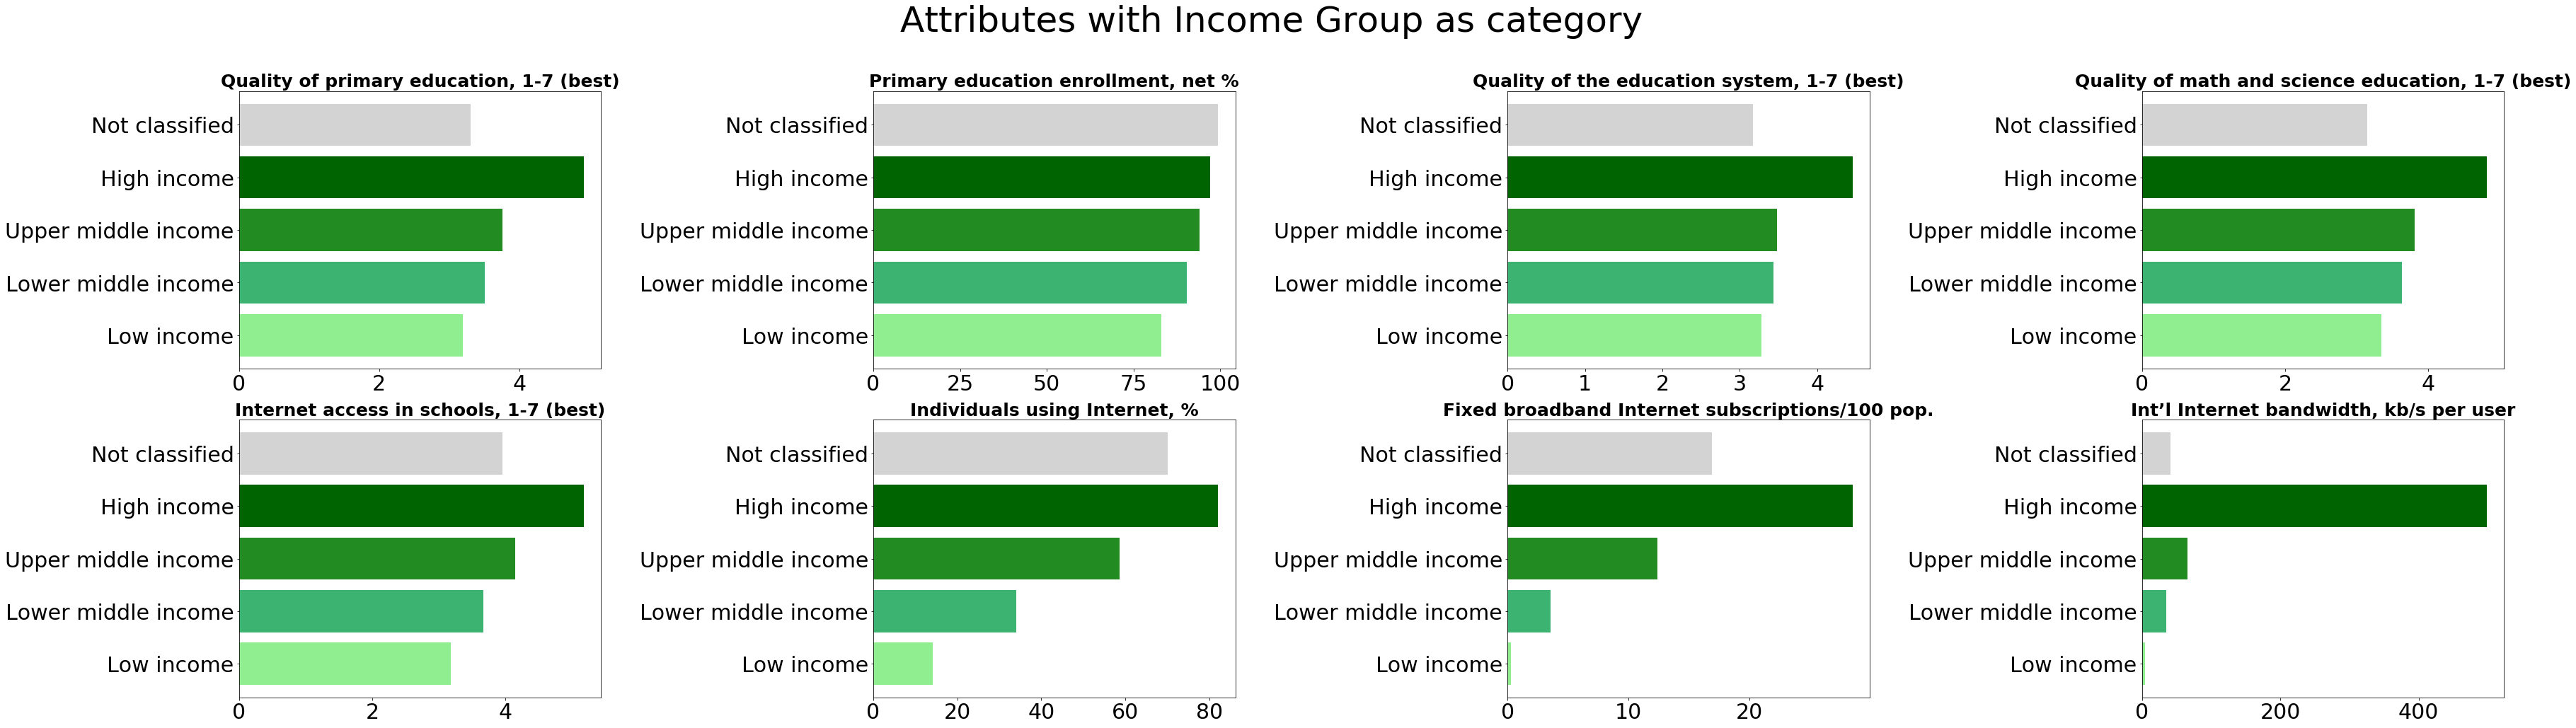

In [110]:
fig, axes = plt.subplots(2, 4, figsize=(50,15))

# specify order of categories
order = {'Low income': 1, 'Lower middle income': 2, 'Upper middle income': 3, 'High income': 4, 'Not classified': 5}

for val, ax in zip(attribute_val, axes.flatten()):
    # make dataset with selected attribute
    temp = edu_df[edu_df.attribute == val].copy()

    # make groupby dataset to sort
    temp2 = pd.DataFrame(temp.groupby(['income_group'])['value']\
    .mean())
    temp2['rank'] = temp2.index.map(order)
    temp2.sort_values('rank', inplace = True)

    # color
    color_list = []
    for attr in temp2.index:
        if attr in ['Not classified']:
            color_list.append('lightgrey')
        elif attr in ['Low income']:
            color_list.append('lightgreen')
        elif attr in  ['Lower middle income']:
            color_list.append('mediumseagreen')
        elif attr in  ['Upper middle income']:
            color_list.append('forestgreen')
        else:
            color_list.append('darkgreen')
    # chart bar plot
    ax.barh(temp2.index, temp2.value, color = color_list)
    
    # chart params
    ax.set_title('{}'.format(val), fontsize = 25, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)

    
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
fig.suptitle('Attributes with Income Group as category', fontsize = 50)
plt.show()

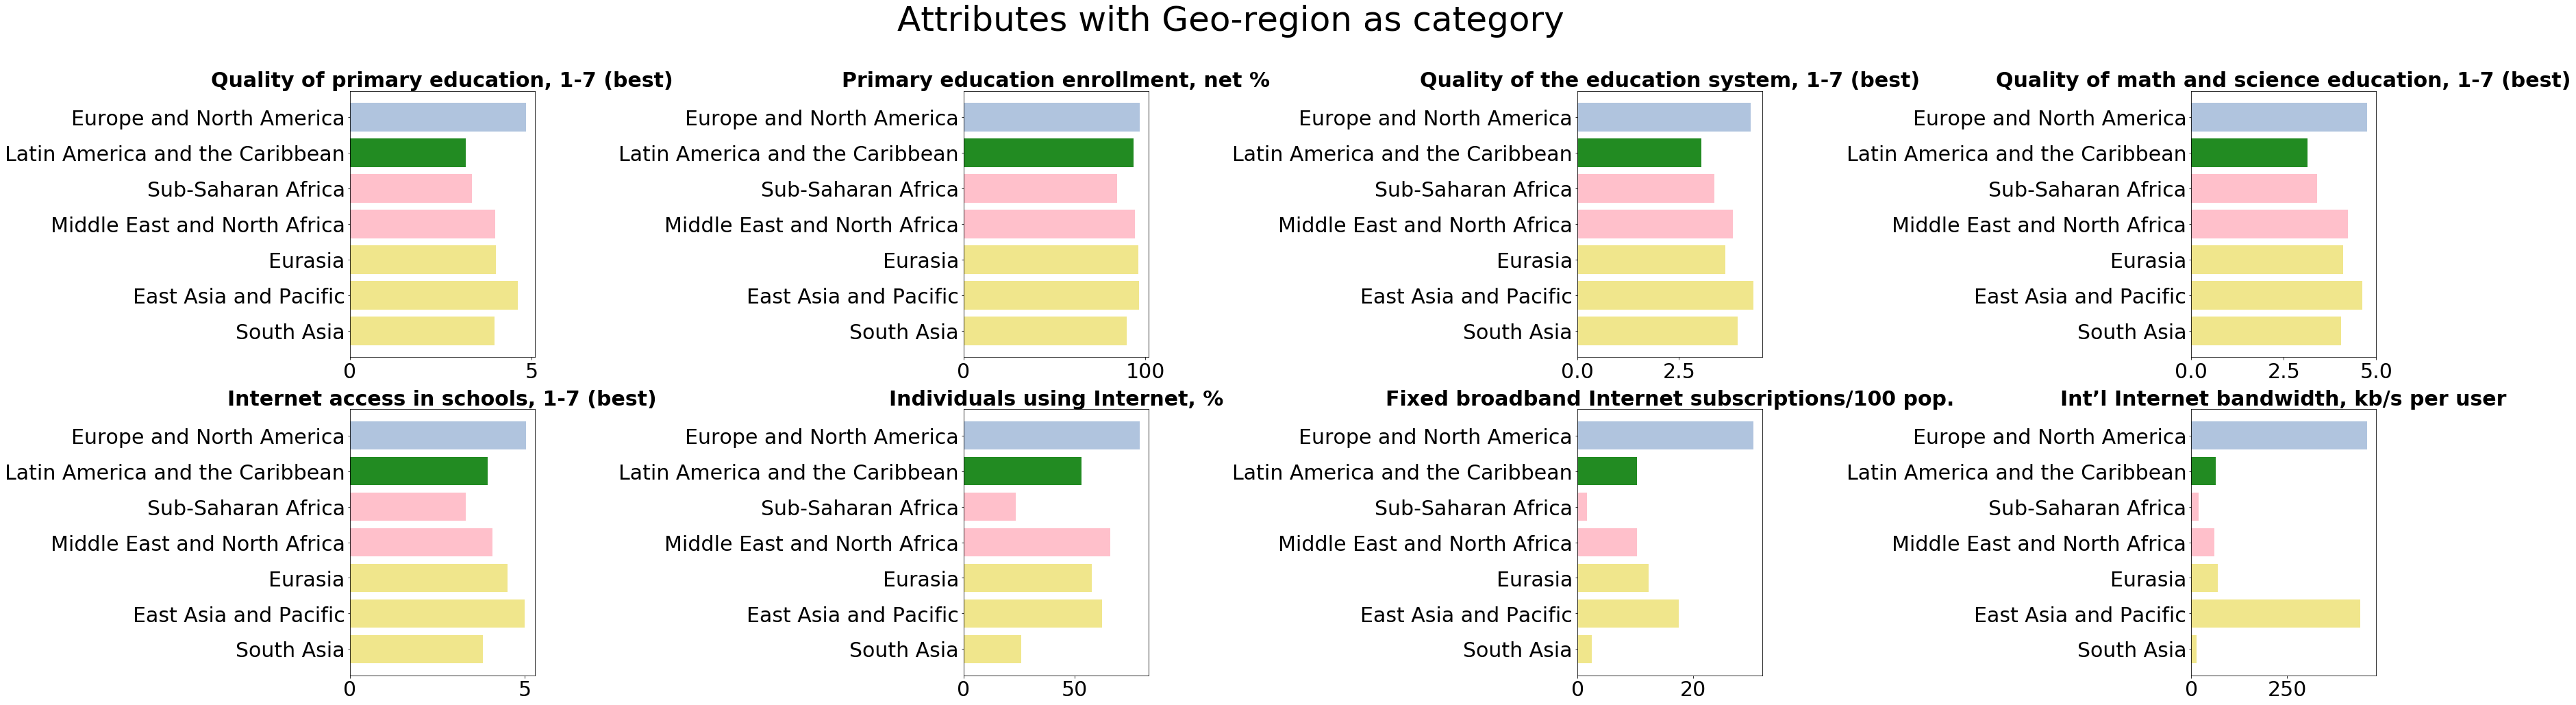

In [116]:
fig, axes = plt.subplots(2, 4, figsize=(50,15))

# specify order of categories
order = {'Europe and North America': 7, 'Latin America and the Caribbean': 6, 
         'Sub-Saharan Africa': 5, 'Middle East and North Africa': 4, 'Eurasia': 3,
        'East Asia and Pacific': 2, 'South Asia': 1}

for val, ax in zip(attribute_val, axes.flatten()):
    # make dataset with selected attribute
    temp = edu_df[edu_df.attribute == val].copy()

    # make groupby dataset to sort
    temp2 = pd.DataFrame(temp.groupby(['geo_region'])['value']\
    .mean())
    temp2['rank'] = temp2.index.map(order)
    temp2.sort_values('rank', inplace = True)
    
    # color
    color_list = []
    for attr in temp2.index:
        if attr in ['Europe and North America']:
            color_list.append('lightsteelblue')
        elif attr in ['Latin America and the Caribbean']:
            color_list.append('forestgreen')
        elif attr in  ['Sub-Saharan Africa', 'Middle East and North Africa']:
            color_list.append('pink')
        else:
            color_list.append('khaki')
    
    # chart bar plot
    ax.barh(temp2.index, temp2.value, color = color_list)
    
    # chart params
    ax.set_title('{}'.format(val), fontsize = 30, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)

    
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
    
fig.suptitle('Attributes with Geo-region as category', fontsize = 50)
plt.show()

In [119]:
attribute_val

['Quality of primary education, 1-7 (best)',
 'Primary education enrollment, net %',
 'Quality of the education system, 1-7 (best)',
 'Quality of math and science education, 1-7 (best)',
 'Internet access in schools, 1-7 (best)',
 'Individuals using Internet, %',
 'Fixed broadband Internet subscriptions/100 pop.',
 'Int’l Internet bandwidth, kb/s per user']

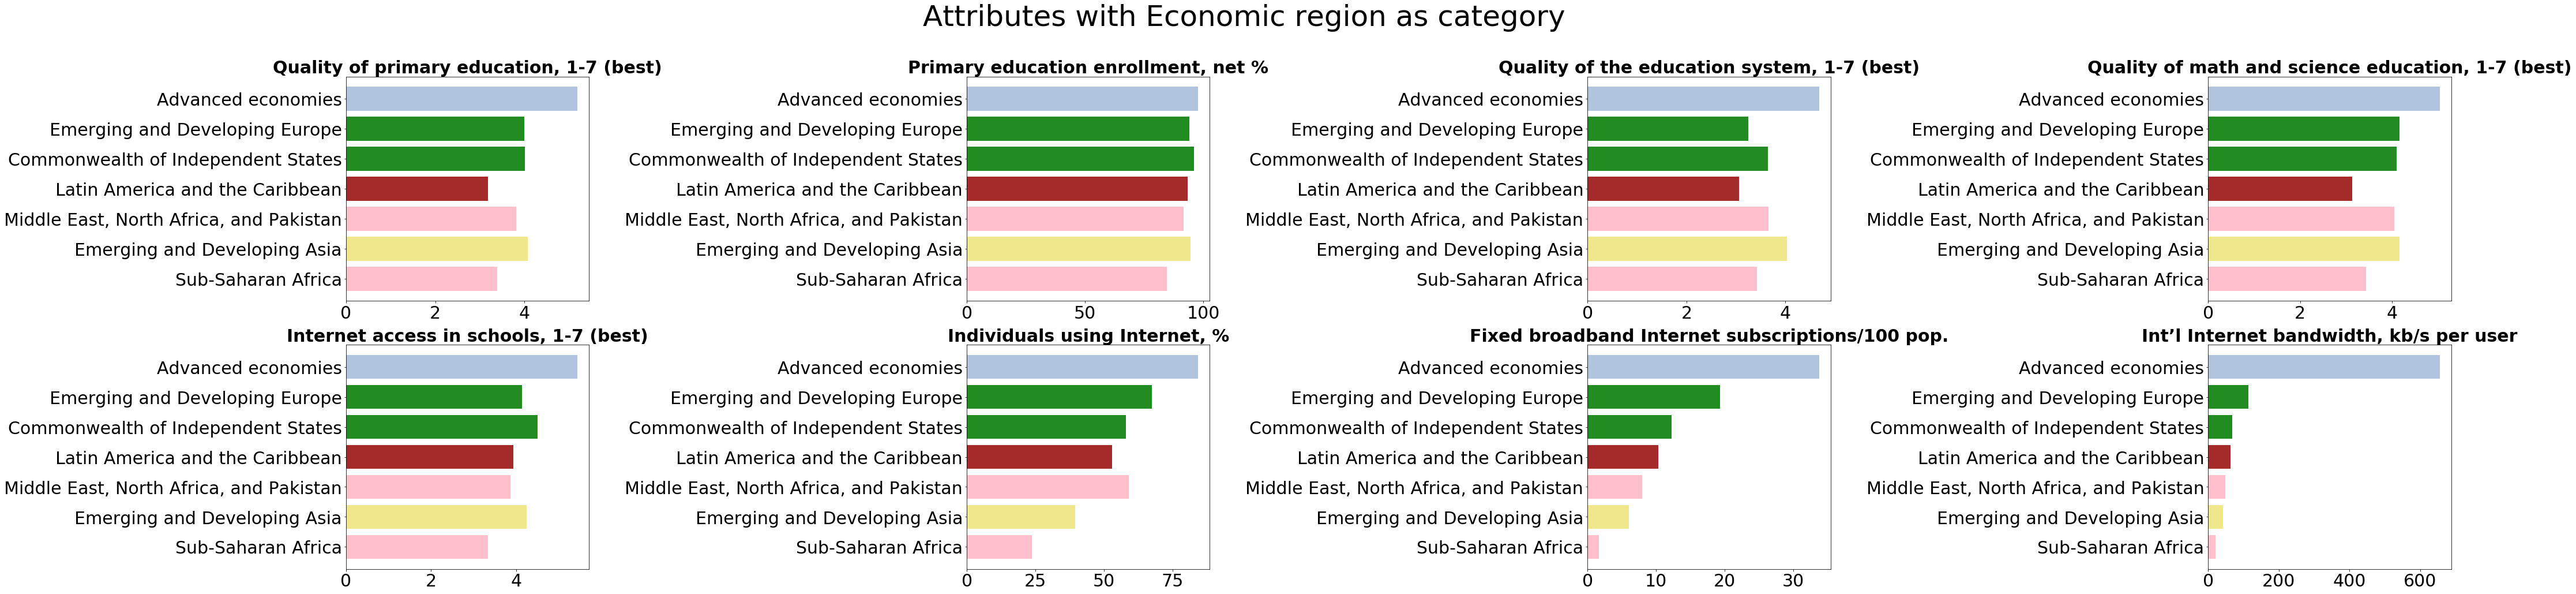

In [118]:
fig, axes = plt.subplots(2, 4, figsize=(60,15))

# specify order of categories
order = {'Advanced economies': 7, 'Emerging and Developing Europe': 6, 
         'Commonwealth of Independent States': 5, 'Latin America and the Caribbean': 4, 'Middle East, North Africa, and Pakistan': 3,
        'Emerging and Developing Asia': 2, 'Sub-Saharan Africa': 1}

for val, ax in zip(attribute_val, axes.flatten()):
    # make dataset with selected attribute
    temp = edu_df[edu_df.attribute == val].copy()

    # make groupby dataset to sort
    temp2 = pd.DataFrame(temp.groupby(['econ_region'])['value']\
    .mean())
    temp2['rank'] = temp2.index.map(order)
    temp2.sort_values('rank', inplace = True)
    
    # color
    color_list = []
    for attr in temp2.index:
        if attr in ['Advanced economies']:
            color_list.append('lightsteelblue')
        elif attr in ['Emerging and Developing Europe', 'Commonwealth of Independent States']:
            color_list.append('forestgreen')
        elif attr in  ['Sub-Saharan Africa', 'Middle East, North Africa, and Pakistan']:
            color_list.append('pink')
        elif attr in ['Latin America and the Caribbean']:
            color_list.append('brown')
        else:
            color_list.append('khaki')
    
    # chart bar plot
    ax.barh(temp2.index, temp2.value, color = color_list)
    
    # chart params
    ax.set_title('{}'.format(val), fontsize = 30, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)

    
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
fig.suptitle('Attributes with Economic region as category', fontsize = 50)
plt.show()

# Clustering

In [70]:
clustering_data = edu_df.copy()

In [71]:
clustering_data.drop('geo_region', axis = 1, inplace = True)

In [72]:
# Pivot data so that country is unique index for clustering 
clustering_data = clustering_data[['entity_code', 'attribute', 'value']]\
    .pivot(index="entity_code", columns='attribute',values="value").reset_index()

# merge back with entity data
clustering_data = clustering_data.merge(countries, how = 'left', left_on = 'entity_code', right_on = 'Entity code')\
    .drop(['Entity code', 'entity_code'], axis = 1)

# rename column
clustering_data.rename(columns={'Entity':'country'}, inplace=True)

In [219]:
clustering_data.head(3)

Fixed broadband Internet subscriptions/100 pop.  \
0                                         8.227068   
1                                        13.299810   
2                                        16.938744   

   Individuals using Internet, %  Internet access in schools, 1-7 (best)  \
0                      66.363441                                5.271418   
1                      90.600006                                5.828802   
2                      70.150764                                3.952558   

   Int’l Internet bandwidth, kb/s per user  \
0                                56.964111   
1                               133.748688   
2                                41.129974   

   Primary education enrollment, net %  \
0                            95.517311   
1                            93.375000   
2                            99.346786   

   Quality of math and science education, 1-7 (best)  \
0                                           4.295430   
1                                           5.342373   
2                                           3.146213   

   Quality of primary education, 1-7 (best)  \
0                                  5.056987   
1                                  5.398798   
2                                  3.310864   

   Quality of the education system, 1-7 (best)               country  \
0                                     4.286576               Albania   
1                                     5.279667  United Arab Emirates   
2                                     3.173132             Argentina   

          income_group                              econ_region  \
0  Upper middle income           Emerging and Developing Europe   
1          High income  Middle East, North Africa, and Pakistan   
2       Not classified          Latin America and the Caribbean   

                        geo_region  
0         Europe and North America  
1     Middle East and North Africa  
2  Latin America and the Caribbean

In [74]:
features = clustering_data.copy()
features.drop('country', axis = 1, inplace = True)

#Creating dummy variables
income_dummy = pd.get_dummies(features['income_group'])
econ_dummy = pd.get_dummies(features['econ_region'])
geo_dummy = pd.get_dummies(features['geo_region'])

#Concatenating the dummy variables to the original dataset 
features=pd.concat([features, income_dummy,econ_dummy, geo_dummy],axis=1)
features.drop(['income_group', 'econ_region', 'geo_region'], axis = 1, inplace = True)

In [75]:
value = features.values
#Passing the values of the dataset to Min-Max-Scaler
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(value)
X = pd.DataFrame(x_scaled,columns=features.columns)

In [217]:
# Hierarchical Clustering by sklearn module
HClustering = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=3).fit(X)

y_HClustering = HClustering.fit_predict(X)

print(y_HClustering)

#Check ingroup similarity
print("silhouette_score : "+str(metrics.silhouette_score(X, y_HClustering)))

#Make file with grouping
data_predicted = clustering_data.copy()
data_predicted["prediction"] = y_HClustering

[0 0 0 0 1 1 0 2 1 2 0 0 0 0 0 0 0 2 1 1 0 0 2 2 0 2 0 1 1 1 1 0 0 0 0 1 1
 2 1 1 1 0 2 2 2 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 2 0 0 1 0 0 0 2 0 2 1 1
 1 0 0 0 2 1 0 0 2 0 2 2 0 2 2 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 2 1 2 0
 0 1 1 2 2 2 0 0 0 0 0 1 2 2 0 0 1 0 0 0 2 2 2]
silhouette_score : 0.32807603


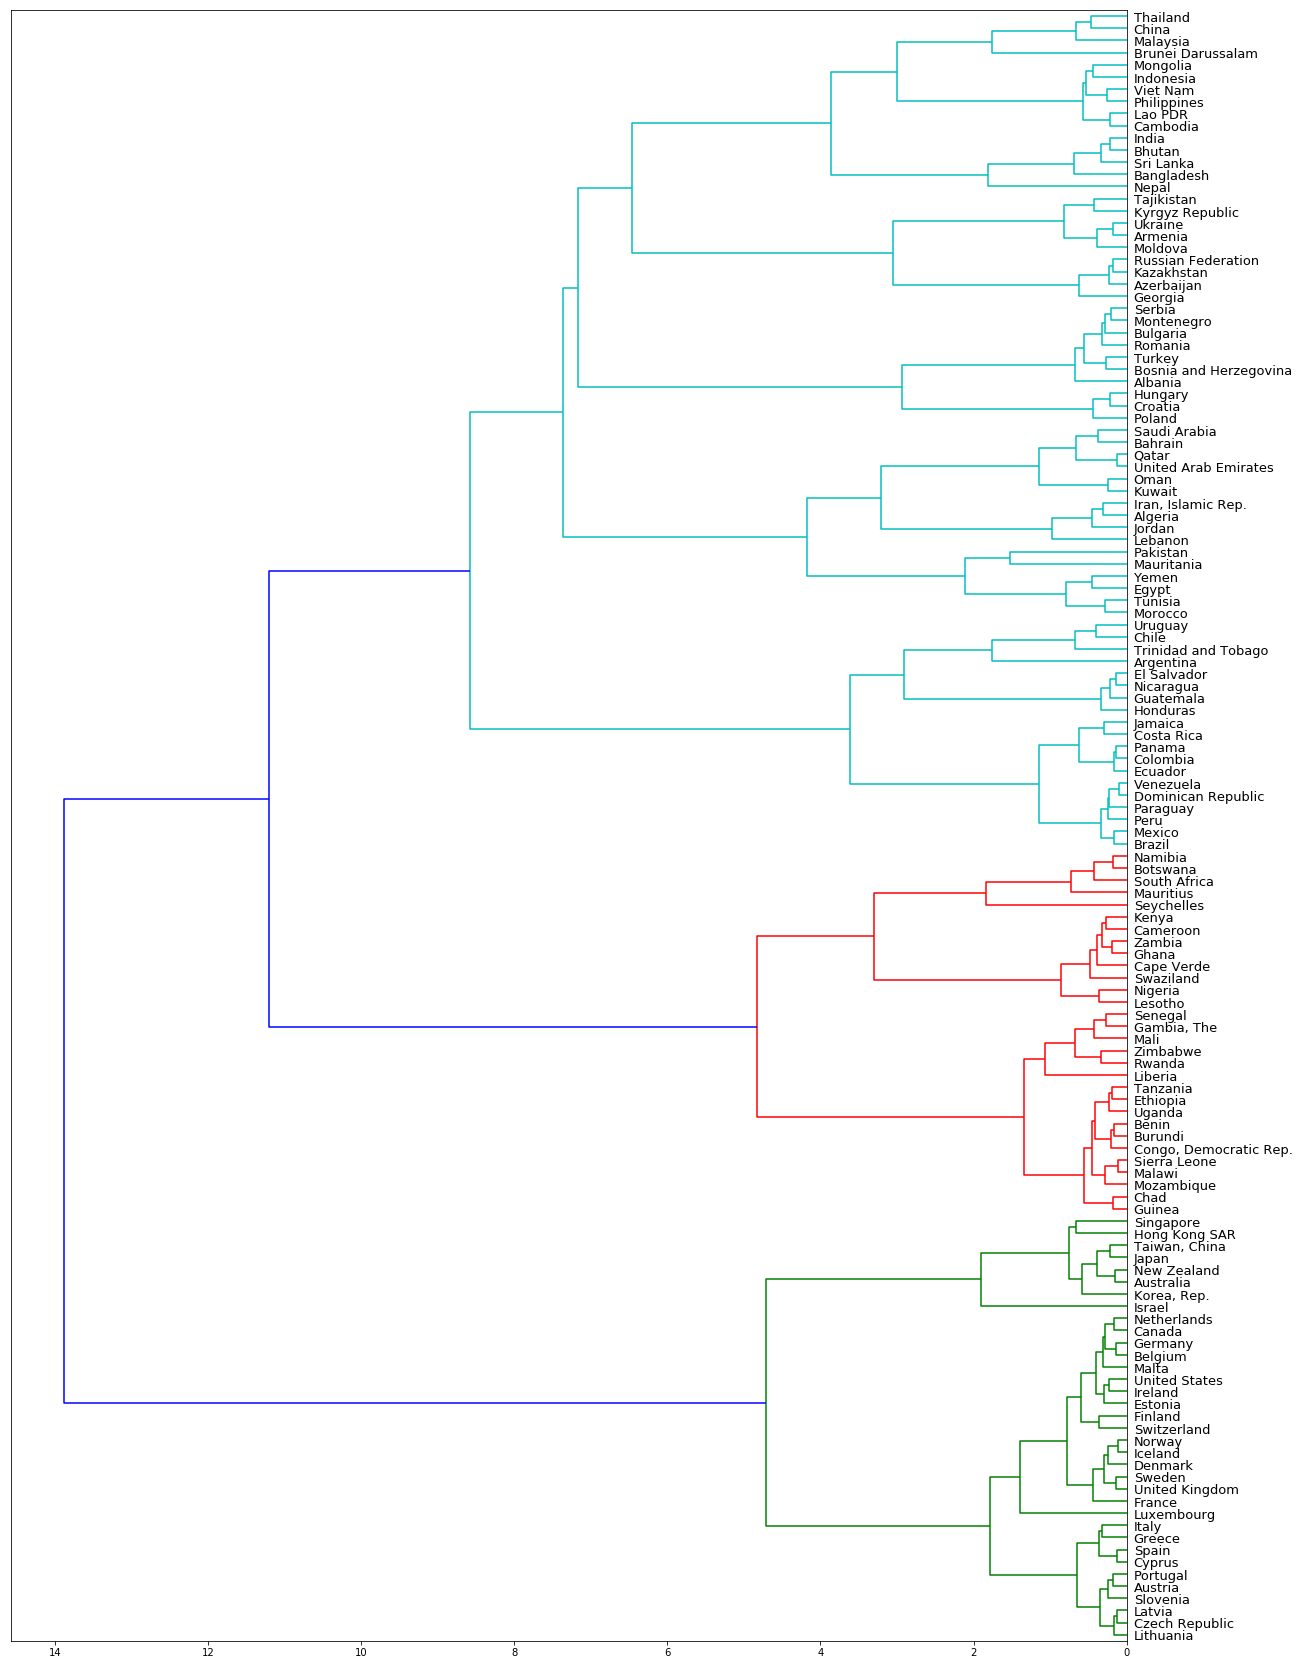

In [218]:
# Dendrogram – scipy module
Z = hierarchy.linkage(X , 'ward')

# Visualize
fig, ax = plt.subplots(1, 1, figsize=(20,30))
dn = hierarchy.dendrogram(Z, labels = clustering_data.country.values, orientation = 'left', ax = ax)
ax.tick_params(axis='y', which='major', labelsize=13)

plt.savefig('dendro.png', format='png', bbox_inches='tight')

#Add threshold line
ax = plt.gca()
bounds = ax.get_xbound()
#ax.plot(bounds, [2,2], '--', c='k')

#Show plot
plt.show()

In [214]:
data_predicted.groupby('prediction').mean()

Fixed broadband Internet subscriptions/100 pop.  \
prediction                                                    
0                                                  8.894494   
1                                                 30.515490   
2                                                  1.630512   

            Individuals using Internet, %  \
prediction                                  
0                               52.019150   
1                               80.688568   
2                               23.667864   

            Internet access in schools, 1-7 (best)  \
prediction                                           
0                                         4.081492   
1                                         5.155740   
2                                         3.337949   

            Int’l Internet bandwidth, kb/s per user  \
prediction                                            
0                                         54.471588   
1                                        535.158020   
2                                         20.377274   

            Primary education enrollment, net %  \
prediction                                        
0                                     93.608475   
1                                     97.090271   
2                                     84.622185   

            Quality of math and science education, 1-7 (best)  \
prediction                                                      
0                                                    3.793119   
1                                                    4.842882   
2                                                    3.432778   

            Quality of primary education, 1-7 (best)  \
prediction                                             
0                                           3.705281   
1                                           4.923406   
2                                           3.384614   

            Quality of the education system, 1-7 (best)  
prediction                                               
0                                              3.554874  
1                                              4.360394  
2                                              3.421658

In [206]:
# Sort the dataframe by target
# Use a list comprehension to create list of sliced dataframes
targets = [data_predicted.loc[data_predicted['prediction'] == val] for val in [0, 1, 2]]

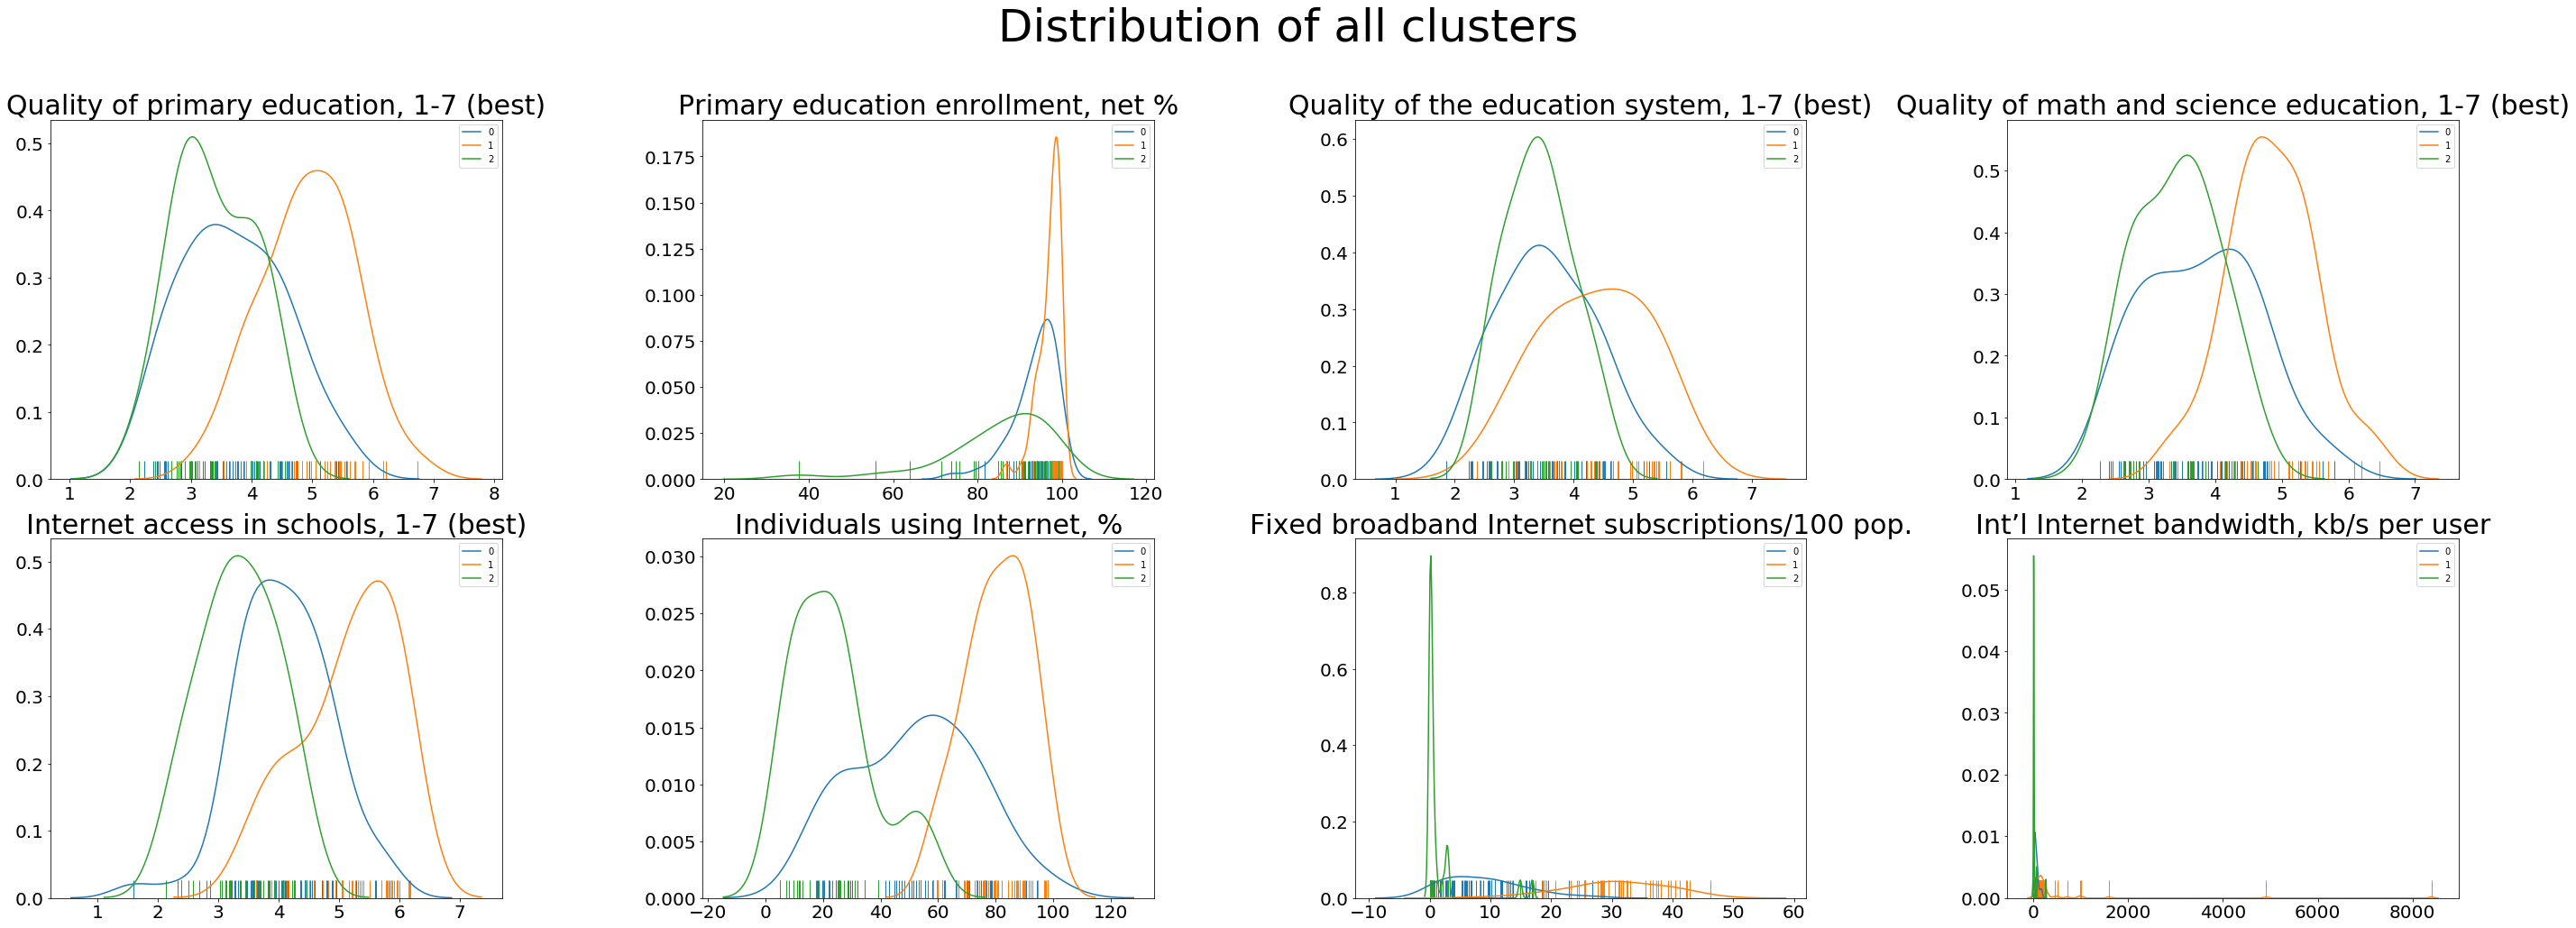

In [239]:
fig, axes = plt.subplots(2, 4, figsize=(40,15))


for attribute, ax in zip(attribute_val, axes.flatten()):
    for i, target in enumerate(targets):
        #for name in list('')
        sns.distplot(target[[attribute]], hist=False, rug=True, label = i, ax = ax)\
        .set_title(attribute, fontsize = 30)
    # chart params
    #ax.set_title('{}'.format(val), fontsize = 30, fontweight='bold')
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    
fig.tight_layout(rect=[0, 0.03, 1, 0.9])
fig.suptitle('Distribution of all clusters', fontsize = 50)
plt.show()
    

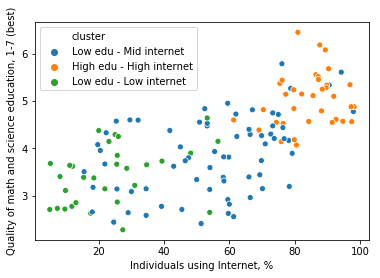

In [242]:
import numpy as np
conditions = [
    (data_predicted['prediction'] ==0),
    (data_predicted['prediction'] == 1),
    (data_predicted['prediction'] == 2)]

# create a list of the values we want to assign for each condition
values = ['Low edu - Mid internet', 'High edu - High internet', 'Low edu - Low internet']

data_predicted['cluster'] = np.select(conditions, values)


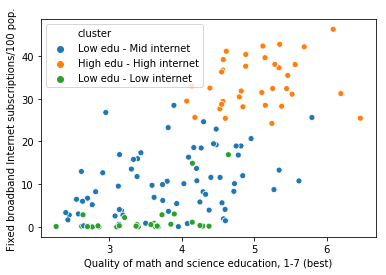

In [247]:
ax = sns.scatterplot(x="Quality of math and science education, 1-7 (best)", y="Fixed broadband Internet subscriptions/100 pop.", hue="cluster",
                     data=data_predicted)

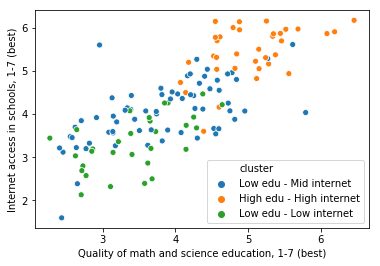

In [245]:
ax = sns.scatterplot(x="Quality of math and science education, 1-7 (best)", y="Internet access in schools, 1-7 (best)", hue="cluster",
                     data=data_predicted)

# World map

In [404]:
import geopandas as gpd  

In [414]:
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country_name', 'country_code', 'geometry']
gdf.head()

country_name country_code  \
0                         Fiji          FJI   
1  United Republic of Tanzania          TZA   
2               Western Sahara          SAH   
3                       Canada          CAN   
4     United States of America          USA   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [415]:
edu_df_1 = edu_df.copy()

In [416]:
merged = gdf.merge(edu_df_1, how = 'left', left_on = 'country_code', right_on = 'entity_code')

In [417]:
merged.sample(5)

country_name country_code  \
113   Dominican Republic          DOM   
163               Mexico          MEX   
208             Colombia          COL   
901          Switzerland          CHE   
1280          Montenegro          MNE   

                                               geometry  \
113   POLYGON ((-71.70830 18.04500, -71.68774 18.316...   
163   POLYGON ((-117.12776 32.53534, -115.99135 32.6...   
208   POLYGON ((-66.87633 1.25336, -67.06505 1.13011...   
901   POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...   
1280  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   

                                              attribute             country  \
113              Internet access in schools, 1-7 (best)  Dominican Republic   
163                 Primary education enrollment, net %              Mexico   
208   Quality of math and science education, 1-7 (best)            Colombia   
901            Quality of primary education, 1-7 (best)         Switzerland   
1280            Int’l Internet bandwidth, kb/s per user          Montenegro   

           value entity_code         income_group  \
113     3.478025         DOM  Upper middle income   
163    95.058296         MEX  Upper middle income   
208     3.387086         COL  Upper middle income   
901     6.207577         CHE          High income   
1280  202.875854         MNE  Upper middle income   

                          econ_region                       geo_region  
113   Latin America and the Caribbean  Latin America and the Caribbean  
163   Latin America and the Caribbean  Latin America and the Caribbean  
208   Latin America and the Caribbean  Latin America and the Caribbean  
901                Advanced economies         Europe and North America  
1280   Emerging and Developing Europe         Europe and North America

In [418]:
merged = merged.dropna(subset=['country_code'])
#Replace NaN values to string 'No data'.
merged.fillna('No data', inplace = True)

In [419]:
merged

country_name country_code  \
0                            Fiji          FJI   
1     United Republic of Tanzania          TZA   
2     United Republic of Tanzania          TZA   
3     United Republic of Tanzania          TZA   
4     United Republic of Tanzania          TZA   
...                           ...          ...   
1279                   Montenegro          MNE   
1280                   Montenegro          MNE   
1281                       Kosovo          KOS   
1282          Trinidad and Tobago          TTO   
1283                  South Sudan          SDS   

                                               geometry  \
0     MULTIPOLYGON (((180.00000 -16.06713, 180.00000...   
1     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
2     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
3     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
4     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
...                                                 ...   
1279  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
1280  POLYGON ((20.07070 42.58863, 19.80161 42.50009...   
1281  POLYGON ((20.59025 41.85541, 20.52295 42.21787...   
1282  POLYGON ((-61.68000 10.76000, -61.10500 10.890...   
1283  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...   

                                            attribute     country    value  \
0                                             No data     No data  No data   
1            Quality of primary education, 1-7 (best)    Tanzania  2.97205   
2                 Primary education enrollment, net %    Tanzania  80.0905   
3             Secondary education enrollment, gross %    Tanzania  32.2561   
4              Tertiary education enrollment, gross %    Tanzania  3.64732   
...                                               ...         ...      ...   
1279  Fixed broadband Internet subscriptions/100 pop.  Montenegro  18.4817   
1280          Int’l Internet bandwidth, kb/s per user  Montenegro  202.876   
1281                                          No data     No data  No data   
1282                                          No data     No data  No data   
1283                                          No data     No data  No data   

     entity_code         income_group                     econ_region  \
0        No data              No data                         No data   
1            TZA           Low income              Sub-Saharan Africa   
2            TZA           Low income              Sub-Saharan Africa   
3            TZA           Low income              Sub-Saharan Africa   
4            TZA           Low income              Sub-Saharan Africa   
...          ...                  ...                             ...   
1279         MNE  Upper middle income  Emerging and Developing Europe   
1280         MNE  Upper middle income  Emerging and Developing Europe   
1281     No data              No data                         No data   
1282     No data              No data                         No data   
1283     No data              No data                         No data   

                    geo_region  
0                      No data  
1           Sub-Saharan Africa  
2           Sub-Saharan Africa  
3           Sub-Saharan Africa  
4           Sub-Saharan Africa  
...                        ...  
1279  Europe and North America  
1280  Europe and North America  
1281                   No data  
1282                   No data  
1283                   No data  

[1284 rows x 10 columns]

In [420]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [425]:
#json_data = json.dumps(merged_json)
json_data('Primary education enrollment, net %')

TypeError: 'str' object is not callable

In [426]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import Slider, HoverTool

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 70, high = 100)

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '0.05': '5%', '0.10':'10%', '0.15':'15%', '0.20':'20%', '0.25':'25%', '0.30':'30%','0.35':'35%', 
                '0.40': '>40%'}

#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country_name'),('value', '@value')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 70, high = 100, nan_color = '#d9d9d9')

#Create figure object.
p = figure(title = 'Value', plot_height = 600 , plot_width = 950, toolbar_location = None,tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'value', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [412]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import Slider, HoverTool

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data('Primary education enrollment, net %'))

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 70, high = 100)

#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '0.05': '5%', '0.10':'10%', '0.15':'15%', '0.20':'20%', '0.25':'25%', '0.30':'30%','0.35':'35%', 
                '0.40': '>40%'}

#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country_name'),('value', '@value')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Instantiate LinearColorMapper that maps numbers in a range linearly into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 70, high = 100, nan_color = '#d9d9d9')

#Create figure object.
p = figure(title = 'Value', plot_height = 600 , plot_width = 950, toolbar_location = None,tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'value', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

TypeError: 'str' object is not callable

In [69]:
attribute_val = list(attribute_val)

['Quality of primary education, 1-7 (best)',
 'Primary education enrollment, net %',
 'Secondary education enrollment, gross %',
 'Tertiary education enrollment, gross %',
 'Quality of the education system, 1-7 (best)',
 'Quality of math and science education, 1-7 (best)',
 'Internet access in schools, 1-7 (best)',
 'Individuals using Internet, %',
 'Fixed broadband Internet subscriptions/100 pop.',
 'Int’l Internet bandwidth, kb/s per user']

In [104]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Select, HoverTool
from bokeh.layouts import widgetbox, row, column
#Define function that returns json_data for year selected by user.
    
def json_data(selectedAttr):
    attribute = selectedAttr
    df_attr = edu_df[edu_df['attribute'] == attribute]
    merged = gdf.merge(df_attr, how = 'left', left_on = 'country_code', right_on = 'entity_code')
    merged.fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data('Quality of primary education, 1-7 (best)'))

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 7, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '1':'1', '2': '2', '3':'3', '4':'4', '5':'5', '6':'6', '7':'7'}

#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country_name'),('Value', '@value')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=7,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'value', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify layout
p.add_layout(color_bar, 'below')

# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = select.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = '{}'.format(yr) 
    
# Make a slider object: slider 
select = Select(title="Option:", value="Quality of primary education, 1-7 (best)", options=attribute_val)
select.on_change('value', update_plot)

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(widgetbox(select),p)
curdoc().add_root(layout)

#Display plot inline in Jupyter notebook
output_notebook()
#Display plot
show(layout)

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html

